<a href="https://colab.research.google.com/github/melisa176/Random_Forest_to_trafic/blob/main/PF_trafico_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar pandas
import pandas as pd

In [ ]:
# Especifica la ruta exacta de tu archivo CSV aquí
ruta_archivo = '/content/drive/MyDrive/trafic_data_n.csv'

In [ ]:
# Leer el archivo CSV
df = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## **Analisis exploratorio (EDA)**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830736 entries, 0 to 2830735
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [ ]:
print(df.head(10))

    Destination Port   Flow Duration   Total Fwd Packets  \
0                 80           38308                   1   
1                389             479                  11   
2                 88            1095                  10   
3                389           15206                  17   
4                 88            1092                   9   
5                389             433                  11   
6                 88            1088                   9   
7                 80          579225                 132   
8              49666               3                   2   
9              49413               4                   3   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            6   
1                        5                          172   
2                        6                         3150   
3                       12                         3452   
4                        6                  

Estadisticas

In [ ]:
print(df.describe())

        Destination Port   Flow Duration   Total Fwd Packets  \
count       2.830736e+06    2.830736e+06        2.830736e+06   
mean        8.071464e+03    1.478562e+07        9.361136e+00   
std         1.828361e+04    3.365368e+07        7.496737e+02   
min         0.000000e+00   -1.300000e+01        1.000000e+00   
25%         5.300000e+01    1.550000e+02        2.000000e+00   
50%         8.000000e+01    3.131600e+04        2.000000e+00   
75%         4.430000e+02    3.204799e+06        5.000000e+00   
max         6.553500e+04    1.200000e+08        2.197590e+05   

        Total Backward Packets  Total Length of Fwd Packets  \
count             2.830736e+06                 2.830736e+06   
mean              1.039376e+01                 5.492970e+02   
std               9.973895e+02                 9.993599e+03   
min               0.000000e+00                 0.000000e+00   
25%               1.000000e+00                 1.200000e+01   
50%               2.000000e+00               

**Valores nulos**

In [ ]:
pd.set_option('display.max_rows', None)
print(df.isnull().sum())

 Destination Port                  0
 Flow Duration                     0
 Total Fwd Packets                 0
 Total Backward Packets            0
Total Length of Fwd Packets        0
 Total Length of Bwd Packets       0
 Fwd Packet Length Max             0
 Fwd Packet Length Min             0
 Fwd Packet Length Mean            0
 Fwd Packet Length Std             0
Bwd Packet Length Max              0
 Bwd Packet Length Min             0
 Bwd Packet Length Mean            0
 Bwd Packet Length Std             0
Flow Bytes/s                    1358
 Flow Packets/s                    0
 Flow IAT Mean                     0
 Flow IAT Std                      0
 Flow IAT Max                      0
 Flow IAT Min                      0
Fwd IAT Total                      0
 Fwd IAT Mean                      0
 Fwd IAT Std                       0
 Fwd IAT Max                       0
 Fwd IAT Min                       0
Bwd IAT Total                      0
 Bwd IAT Mean                      0
 

**Filas duplicadas**

In [ ]:
print(df.duplicated().sum())

308380


**Filas con valores infinitivo (inf)**

In [ ]:
import numpy as np

In [ ]:
numeric_cols = df.select_dtypes(include = np.number).columns
inf_count = np.isinf(df[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s       1509
 Flow Packets/s    2867
dtype: int64


In [ ]:



numeric_cols = df.select_dtypes(include=np.number).columns

# Filtrar las filas que contienen valores infinitos en alguna columna numérica
inf_values = df[np.isinf(df[numeric_cols]).any(axis=1)]

# Comprobar que las columnas de interés existen en 'inf_values'
columns_to_show = ['Flow Bytes/s', ' Flow Packets/s']

# Verificar si las columnas existen en el DataFrame inf_values
existing_columns = [col for col in columns_to_show if col in inf_values.columns]

# Filtrar solo las columnas existentes que contienen valores infinitos
inf_values_filtered = inf_values[existing_columns]

# Mostrar las primeras 10 filas con valores infinitos
print("Primeras 10 filas con valores infinitos en las columnas seleccionadas:")
print(inf_values_filtered.head(10))

# Mostrar cuántos valores infinitos tiene cada columna seleccionada
inf_count = np.isinf(inf_values[existing_columns]).sum()
print("\nCantidad de valores infinitos por columna:")
print(inf_count)

Primeras 10 filas con valores infinitos en las columnas seleccionadas:
      Flow Bytes/s   Flow Packets/s
1392           inf              inf
2041           inf              inf
2395           inf              inf
3097           inf              inf
3789           inf              inf
4301           inf              inf
4939           inf              inf
5106           NaN              inf
5833           NaN              inf
6553           inf              inf

Cantidad de valores infinitos por columna:
Flow Bytes/s       1509
 Flow Packets/s    2867
dtype: int64


**Valores unicos de Label**

In [ ]:
df[' Label'].value_counts()

,count
Label,
BENIGN,2273090
DoS Hulk,231073
PortScan,158930
DDoS,128027
DoS GoldenEye,10293
FTP-Patator,7938
SSH-Patator,5897
DoS slowloris,5796
DoS Slowhttptest,5499


Recomendaciones:
- Eliminar espacios en los nombres de las columnas
- Eliminar duplicados (308 380)
- Remplazar **inf** de Flow Bytes/s y Flow Packets/s con NaN.
- Imputar con la mediana los **nulos** de Flow Bytes/s y Flow Packets/s.
- Eliminar columnas  Bwd PSH Flags, Bwd URG Flags, Fwd Avg Bytes/Bulk, Fwd Avg Packets/Bulk, Fwd Avg Bulk Rate, Bwd Avg Bytes/Bulk ,Bwd Avg Packets/Bulk, Bwd Avg Bulk Rate  porque tienen solo un valor.
- Agrupar:

   DoS:          DoS Hulk, DoS GoldenEye,  DoS Slowloris,    y DoS Slowhttptest

   Web Attack:   Web Attack - Brute Force, Web Attack - XSS, y  Web Attack
   
   Brute Force:  FTP-Patator             y SSH-Patator.
- Etiquetar con Label Encoder ' Label'

# **Preprocesamiento**

In [ ]:
import numpy as np

### **Limpieza**

Eliminar espacio antes y despues de las variables

In [ ]:
col_names = {col: col.strip() for col in df.columns}
df.rename(columns = col_names, inplace=True)

Eliminar duplicados (308 380)

In [ ]:
df.drop_duplicates(inplace=True)
duplicados_restantes = df.duplicated().sum()
print(f"Filas duplicadas restantes: {duplicados_restantes}")


Remplazar inf de Flow Bytes/s y Flow Packets/s con NaN

In [ ]:
df['Flow Bytes/s'] = df['Flow Bytes/s'].replace([np.inf, -np.inf], np.nan)
df['Flow Packets/s'] = df['Flow Packets/s'].replace([np.inf, -np.inf], np.nan)

Imputar con la mediana los nulos de Flow Bytes/s y Flow Packets/s.

In [ ]:
df['Flow Bytes/s'] = df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].median())
df['Flow Packets/s'] = df['Flow Packets/s'].fillna(df['Flow Packets/s'].median())

Eliminar columnas porque tienen solo un valor.

In [ ]:
columns_to_drop = ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk',
                   'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']

# Eliminar las columnas y asignar el resultado de vuelta al DataFrame
df = df.drop(columns=columns_to_drop)

In [ ]:
# 1. Imprimir cantidad de columnas
print(f'Número de columnas: {df.shape[1]}')

# 2. Imprimir cantidad de valores nulos por columna
print("\nValores nulos por columna:")
print(df.isna().sum())

# 3. Imprimir cantidad de valores infinitos por columna (solo en columnas numéricas)
print("\nValores infinitos por columna:")
numeric_cols = df.select_dtypes(include=np.number).columns  # Seleccionar solo columnas numéricas
inf_count = np.isinf(df[numeric_cols]).sum()  # Contar los infinitos en las columnas numéricas
print(inf_count[inf_count > 0])

# 4. Imprimir cantidad de duplicados en el DataFrame
print(f'\nNúmero de filas duplicadas: {df.duplicated().sum()}')

Número de columnas: 71

Valores nulos por columna:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max              

*Agrupar* en tipo ataque

In [ ]:
# Agrupar las categorías de ataque en una nueva columna 'tipo_ataque'
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS', 'DoS GoldenEye': 'DoS', 'DoS slowloris': 'DoS', 'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force', 'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack', 'Web Attack � XSS': 'Web Attack', 'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Crear una nueva columna 'tipo_ataque' basada en el mapeo
df['tipo_ataque'] = df['Label'].map(attack_map)

# Verificar los valores únicos después del mapeo
print("Unique Attack Types after mapping:")
print(df['tipo_ataque'].unique())


Unique Attack Types after mapping:
['BENIGN' 'DoS' 'Heartbleed' 'Brute Force' 'Port Scan' 'DDoS' 'Bot'
 'Web Attack' 'Infiltration']


In [ ]:
# Eliminar la columna original 'Label' ya que ahora tenemos 'tipo_ataque'
df.drop('Label', axis=1, inplace=True)

Etiquetar Tipo ataque

In [ ]:
# Codificar la columna 'tipo_ataque' con LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['tipo_ataque'] = le.fit_transform(df['tipo_ataque'])

# Ver los valores únicos de la nueva columna codificada
print("\nEncoded 'tipo_ataque' values:")
print(df['tipo_ataque'].unique())

# Mostrar la correspondencia entre los valores codificados y las categorías originales
encoded_values = df['tipo_ataque'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")


Encoded 'tipo_ataque' values:
[0 4 5 2 7 3 1 8 6]
0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [ ]:
df


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830731,80,590930,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830732,80,1187988,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830733,80,10,1,9,6,54,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830734,138,19,10,0,2370,0,237,237,237.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Correlacion

In [ ]:
# Calcular la matriz de correlación entre las columnas numéricas
corr = df.corr(numeric_only=True).round(2)

# Aplicar el estilo con un gradiente de colores para visualizar mejor las correlaciones
styled_corr = corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

# Mostrar la matriz de correlación estilizada
styled_corr

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,tipo_ataque
Destination Port,1.00,-0.17,-0.00,-0.00,0.01,-0.00,0.09,-0.05,0.14,0.12,-0.21,-0.26,-0.24,-0.19,0.07,0.36,-0.11,-0.13,-0.13,-0.02,-0.17,-0.11,-0.11,-0.13,-0.06,-0.12,-0.08,-0.04,-0.06,-0.06,0.23,0.00,0.00,0.00,0.35,0.14,-0.26,-0.14,-0.17,-0.14,-0.08,-0.04,0.23,-0.01,-0.22,0.59,0.52,0.00,-0.01,0.03,-0.17,0.14,-0.24,0.00,-0.00,0.01,-0.00,-0.00,-0.13,0.21,-0.00,0.00,-0.04,-0.05,-0.06,-0.03,-0.13,0.01,-0.12,-0.13,-0.13
Flow Duration,-0.17,1.00,0.02,0.02,0.06,0.02,0.26,-0.12,0.13,0.22,0.49,-0.24,0.45,0.43,-0.02,-0.11,0.53,0.73,0.78,0.06,1.00,0.54,0.72,0.78,0.21,0.82,0.41,0.52,0.58,0.21,-0.02,-0.00,-0.00,-0.00,-0.10,-0.08,-0.25,0.50,0.42,0.45,0.27,0.22,-0.02,0.01,0.18,0.03,-0.12,-0.00,0.01,-0.17,0.39,0.13,0.45,-0.00,0.02,0.06,0.02,0.02,0.09,-0.03,0.02,-0.00,0.18,0.24,0.29,0.12,0.76,0.24,0.78,0.73,0.21
Total Fwd Packets,-0.00,0.02,1.00,1.00,0.37,1.00,0.01,-0.00,-0.00,0.00,0.02,-0.01,0.02,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.02,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,-0.00,-0.00,-0.01,0.02,0.02,0.01,0.01,-0.00,0.00,0.00,0.01,0.00,-0.00,-0.00,0.00,0.00,0.02,-0.00,0.02,0.00,1.00,0.37,1.00,1.00,0.00,-0.00,0.89,-0.00,0.04,0.01,0.03,0.04,0.00,0.00,0.00,0.00,-0.00
Total Backward Packets,-0.00,0.02,1.00,1.00,0.36,0.99,0.01,-0.00,-0.00,0.00,0.02,-0.01,0.02,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.02,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,-0.00,-0.00,-0.01,0.02,0.02,0.01,0.01,-0.00,0.00,0.00,0.01,0.00,-0.00,-0.00,0.00,0.00,0.02,-0.00,0.02,0.00,1.00,0.36,1.00,0.99,0.00,-0.00,0.88,0.00,0.04,0.01,0.03,0.04,0.00,0.00,0.00,0.00,-0.00
Total Length of Fwd Packets,0.01,0.06,0.37,0.36,1.00,0.35,0.20,-0.00,0.19,0.16,0.02,-0.03,0.02,0.01,0.00,-0.01,0.00,0.01,0.02,-0.00,0.06,0.00,0.02,0.02,-0.01,0.08,0.01,0.04,0.04,-0.01,0.01,-0.00,-0.00,0.01,-0.01,-0.01,-0.03,0.07,0.08,0.06,0.03,-0.01,0.01,0.00,0.04,-0.00,-0.01,-0.00,0.00,-0.01,0.08,0.19,0.02,-0.00,0.37,1.00,0.36,0.35,0.03,0.01,0.41,-0.00,0.10,0.10,0.13,0.07,0.02,0.03,0.02,0.02,-0.01
Total Length of Bwd Packets,-0.00,0.02,1.00,0.99,0.35,1.00,0.01,-0.00,-0.00,-0.00,0.02,-0.00,0.02,0.01,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.01,-0.00,-0.00,-0.00,0.02,0.02,0.01,0.01,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.02,-0.00,0.02,0.00,1.00,0.35,0.99,1.00,0.00,-0.00,0.88,0.00,0.04,0.00,0.02,0.04,0.00,0.00,0.00,0.00,-0.00
Fwd Packet Length Max,0.09,0.26,0.01,0.01,0.20,0.01,1.00,-0.00,0.89,0.97,0.08,-0.14,0.06,0.07,0.04,-0.06,0.06,0.15,0.19,-0.02,0.26,0.08,0.22,0.20,-0.03,0.29,0.06,0.26,0.25,-0.03,0.01,-0.00,0.00,0.00,-0.05,-0.05,-0.15,0.38,0.33,0.34,0.25,-0.00,0.01,0.02,0.23,-0.03,0.02,-0.00,0.02,-0.05,0.32,0.89,0.06,0.00,0.01,0.20,0.01,0.01,0.16,0.02,0.01,0.00,0.12,0.09,0.14,0.10,0.17,0.18,0.19,0.15,-0.05
Fwd Packet Length Mi

In [ ]:
# Calcular la correlación entre todas las variables numéricas con respecto a 'tipo_ataque'
corr_with_tipo_ataque = df.corr(numeric_only=True)['tipo_ataque'].round(2)

# Filtrar las columnas cuya correlación con 'tipo_ataque' es exactamente 0
columns_with_zero_corr = corr_with_tipo_ataque[corr_with_tipo_ataque == 0].index.tolist()

# Imprimir las columnas con correlación exactamente 0
print("Columnas con correlación exactamente 0 con 'tipo_ataque':\n")
for column in columns_with_zero_corr:
    print(f'{column}')


Columnas con correlación exactamente 0 con 'tipo_ataque':

Total Fwd Packets
Total Backward Packets
Total Length of Bwd Packets
Fwd URG Flags
Fwd Header Length
Bwd Header Length
CWE Flag Count
Fwd Header Length.1
Subflow Fwd Packets
Subflow Bwd Packets
Subflow Bwd Bytes
act_data_pkt_fwd
min_seg_size_forward


In [ ]:
df.shape

(2522356, 71)

In [ ]:
# Lista de columnas a eliminar
columns_to_remove = [
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Bwd Packets',
    'Fwd URG Flags',
    'Fwd Header Length',
    'Bwd Header Length',
    'CWE Flag Count',
    'Fwd Header Length.1',
    'Subflow Fwd Packets',
    'Subflow Bwd Packets',
    'Subflow Bwd Bytes',
    'act_data_pkt_fwd',
    'min_seg_size_forward'
]

# Eliminar las columnas del DataFrame
df = df.drop(columns=columns_to_remove)

# Calcular la correlación entre todas las variables numéricas con respecto a 'tipo_ataque' después de eliminar las columnas
corr_with_tipo_ataque_cleaned = df.corr(numeric_only=True)['tipo_ataque'].round(2)

# Filtrar las columnas cuya correlación con 'tipo_ataque' es exactamente 0
columns_with_zero_corr_cleaned = corr_with_tipo_ataque_cleaned[corr_with_tipo_ataque_cleaned == 0].index.tolist()

# Imprimir las columnas con correlación exactamente 0 con 'tipo_ataque' después de eliminar las columnas
print("Columnas con correlación exactamente 0 con 'tipo_ataque' después de eliminar las columnas específicas:\n")
for column in columns_with_zero_corr_cleaned:
    print(f'{column}')


Columnas con correlación exactamente 0 con 'tipo_ataque' después de eliminar las columnas específicas:



In [ ]:
df.shape

(2522356, 58)



```
# Esto tiene formato de código
```

# Multicolinealidad

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = df.drop(columns=['tipo_ataque'])


# Calcular VIF
vif_resultados = pd.DataFrame()
vif_resultados["variable"] = df_vif.columns
vif_resultados["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

print(vif_resultados)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                  variable          VIF
0            Flow Duration  1391.398316
1    Bwd Packet Length Max   155.153495
2    Bwd Packet Length Min     3.517846
3   Bwd Packet Length Mean          inf
4    Bwd Packet Length Std   154.774022
5             Flow IAT Std    13.449584
6             Flow IAT Max  1012.325478
7            Fwd IAT Total  1377.091627
8              Fwd IAT Std    10.599591
9              Fwd IAT Max  1003.463145
10       Min Packet Length     3.737581
11       Max Packet Length   152.239487
12      Packet Length Mean   821.818358
13       Packet Length Std   357.298385
14  Packet Length Variance    20.668928
15          FIN Flag Count     1.391399
16          PSH Flag Count     2.210437
17     Average Packet Size   748.644227
18    Avg Bwd Segment Size          inf
19               Idle Mean  5691.194802
20                Idle Max  1502.303821
21                Idle Min  1449.741146


In [ ]:
from numpy.linalg import cond

# Número de condición (basado en la matriz de diseño X)
condition_number = cond(df_vif)
print(f"Número de condición: {condition_number:.2f}")


Número de condición: 33922368476478108.00


In [ ]:

# 3. Calcular la matriz de correlación absoluta
corr_matrix = df_vif.corr().abs()

# 4. Imprimir correlaciones fuertes en texto plano
print("📌 PARES DE VARIABLES CON CORRELACIÓN > 0.95:\n")
encontrado = False
columnas = corr_matrix.columns

for i in range(len(columnas)):
    for j in range(i + 1, len(columnas)):
        corr_value = corr_matrix.iloc[i, j]
        if corr_value > 0.95:
            print(f"{columnas[i]} - {columnas[j]} = {corr_value:.3f}")
            encontrado = True

if not encontrado:
    print("✅ No se encontraron pares con correlación fuerte (> 0.95).")

📌 PARES DE VARIABLES CON CORRELACIÓN > 0.95:

Flow Duration - Fwd IAT Total = 0.999
Bwd Packet Length Max - Bwd Packet Length Mean = 0.958
Bwd Packet Length Max - Bwd Packet Length Std = 0.983
Bwd Packet Length Max - Avg Bwd Segment Size = 0.958
Bwd Packet Length Mean - Avg Bwd Segment Size = 1.000
Flow IAT Max - Fwd IAT Max = 0.998
Flow IAT Max - Idle Mean = 0.980
Flow IAT Max - Idle Max = 0.989
Flow IAT Max - Idle Min = 0.951
Fwd IAT Max - Idle Mean = 0.978
Fwd IAT Max - Idle Max = 0.989
Max Packet Length - Packet Length Std = 0.984
Packet Length Mean - Average Packet Size = 0.998
Idle Mean - Idle Max = 0.990
Idle Mean - Idle Min = 0.990
Idle Max - Idle Min = 0.961


Eliminar en pares el de menor correlacion

In [ ]:
files.download("limpio.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **PREPROCESAMIENTO**

Paso 1: Importar librerías


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

Paso 2: Separar caracteriticas

In [ ]:
# Separa la variable objetivo
y = df['tipo_ataque']

# Prepara las variables predictoras
X = df.drop(columns=['tipo_ataque'])

In [ ]:
print(df.columns.tolist())

['Destination Port', 'Flow Duration', 'Total Length of Fwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'Active Mean', 'Active S

In [ ]:

    # Variables numéricas con grandes rangos
numerical_features = ['Destination Port', 'Flow Duration', 'Total Length of Fwd Packets',
                      'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean',
                      'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min',
                      'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
                      'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total',
                      'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total',
                      'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
                      'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
                      'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'RST Flag Count',
                      'ACK Flag Count', 'URG Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
                      'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
                      'Subflow Fwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
                      'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
                      'Idle Std', 'Idle Max', 'Idle Min']

from sklearn.preprocessing import StandardScaler

# Usamos StandardScaler para estandarizar las características numéricas
numerical_transformer = RobustScaler()

binary_features = ['FIN Flag Count', 'PSH Flag Count']

Paso 5: definir preprocesar

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),  # Escalar las características numéricas
        ('binary', 'passthrough', binary_features)  # Dejar las características binarias sin cambios
    ],
    remainder='passthrough'  # Mantener otras columnas no especificadas
)

## Particion de datos


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN  # Usamos ADASYN en lugar de SMOTE


# 1. Eliminar filas con las clases 5 y 6 en 'tipo_ataque'
rare_labels = [5, 6]  # Clases con pocos datos
df_filtered = df[~df['tipo_ataque'].isin(rare_labels)]  # Elimina las filas con esas clases

# 2. Ahora particionamos el dataset filtrado en entrenamiento, validación y prueba
X = df_filtered.drop('tipo_ataque', axis=1)
y = df_filtered['tipo_ataque']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 3. Submuestreo de las clases mayoritarias (utilizando un diccionario de clases)
under_sampler = RandomUnderSampler(sampling_strategy={0: 50000, 1: 500, 2: 2000, 3: 2000, 4: 2000, 7: 2000, 8: 200}, random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# 4. Sobremuestreo de las clases minoritarias con SMOTE (utilizando un diccionario de clases)
smote = SMOTE(sampling_strategy={1: 500, 8: 500}, random_state=42)  # Ajusta las clases minoritarias
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_under, y_train_under)

# 4. Aplicar preprocesamiento a los conjuntos de datos
X_train_processed = preprocessor.fit_transform(X_train_resampled)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)


# Analisis de Varianza Explicada

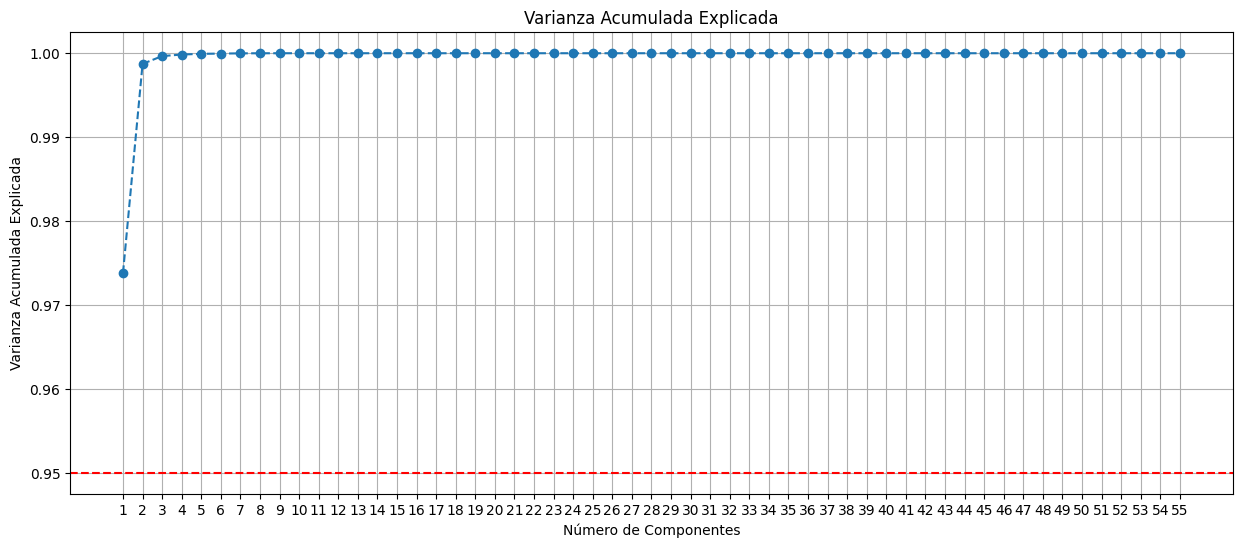

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 6. Excluir las variables binarias de X_train_processed antes de aplicar PCA
# Asumimos que las primeras columnas de X_train_processed corresponden a las variables numéricas
# Y que las variables binarias se encuentran después de las variables numéricas en el preprocesador
numerical_data = X_train_processed[:, :len(numerical_features)]  # Solo las características numéricas

# Aplicar PCA solo sobre las características numéricas
pca = PCA()  # Si quieres retener el 95% de la varianza, puedes usar n_components=0.95
X_train_pca = pca.fit_transform(numerical_data)


plt.figure(figsize=(15, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Varianza Acumulada Explicada')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.axhline(y=0.95, color='r', linestyle='--')  # Límite de 95% de varianza explicada
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))  # Incrementar de uno en uno en el eje x
plt.grid(True)  # Añadir cuadrícula
plt.show()

In [ ]:
kaiser_criteria = np.where(pca.explained_variance_ > 1)[0] + 1  # Los componentes cuyo valor propio es mayor que 1
print(f'Componentes según el criterio de Kaiser (valores propios > 1): {kaiser_criteria}')

Componentes según el criterio de Kaiser (valores propios > 1): [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [ ]:
# Calcular varianza acumulada explicada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Imprimir la varianza acumulada explicada
print("Varianza acumulada explicada por los componentes principales:")
for i, varianza in enumerate(varianza_acumulada, 1):
    print(f"Componente {i}: {varianza * 100:.2f}%")

Varianza acumulada explicada por los componentes principales:
Componente 1: 97.38%
Componente 2: 99.87%
Componente 3: 99.97%
Componente 4: 99.98%
Componente 5: 99.99%
Componente 6: 100.00%
Componente 7: 100.00%
Componente 8: 100.00%
Componente 9: 100.00%
Componente 10: 100.00%
Componente 11: 100.00%
Componente 12: 100.00%
Componente 13: 100.00%
Componente 14: 100.00%
Componente 15: 100.00%
Componente 16: 100.00%
Componente 17: 100.00%
Componente 18: 100.00%
Componente 19: 100.00%
Componente 20: 100.00%
Componente 21: 100.00%
Componente 22: 100.00%
Componente 23: 100.00%
Componente 24: 100.00%
Componente 25: 100.00%
Componente 26: 100.00%
Componente 27: 100.00%
Componente 28: 100.00%
Componente 29: 100.00%
Componente 30: 100.00%
Componente 31: 100.00%
Componente 32: 100.00%
Componente 33: 100.00%
Componente 34: 100.00%
Componente 35: 100.00%
Componente 36: 100.00%
Componente 37: 100.00%
Componente 38: 100.00%
Componente 39: 100.00%
Componente 40: 100.00%
Componente 41: 100.00%
Component

# **PCA**

In [ ]:
import numpy as np

from sklearn.decomposition import PCA

In [ ]:
# Convertir X_train_processed a un DataFrame para verlo con nombres de columnas
X_train_df = pd.DataFrame(X_train_processed, columns=numerical_features + binary_features)
X_val_df = pd.DataFrame(X_val_processed, columns=numerical_features + binary_features)
X_test_df = pd.DataFrame(X_test_processed, columns=numerical_features + binary_features)


# 4. Guardar las columnas 'FIN Flag Count' y 'PSH Flag Count' antes de aplicar PCA
columns_to_remove = ['FIN Flag Count', 'PSH Flag Count']
X_train_removed = X_train_df[columns_to_remove]
X_val_removed = X_val_df[columns_to_remove]
X_test_removed = X_test_df[columns_to_remove]

# 5. Eliminar las columnas 'FIN Flag Count' y 'PSH Flag Count' de los DataFrames procesados
X_train_df = X_train_df.drop(columns=columns_to_remove)
X_val_df = X_val_df.drop(columns=columns_to_remove)
X_test_df = X_test_df.drop(columns=columns_to_remove)

# 6. Aplicar PCA con 6 componentes principales
pca = PCA(n_components=30)

# Ajustar el PCA al conjunto de entrenamiento
X_train_pca = pca.fit_transform(X_train_df)

# Transformar los conjuntos de validación y prueba
X_val_pca = pca.transform(X_val_df)
X_test_pca = pca.transform(X_test_df)

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Crear DataFrames de los datos transformados por PCA
train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(30)])
val_pca_df = pd.DataFrame(X_val_pca, columns=[f'PC{i+1}' for i in range(30)])
test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(30)])

# PASO 1: Asegúrate de que los índices estén alineados en cada conjunto
# Restablecer índices de los DataFrames de PCA y de las columnas eliminadas
train_removed = X_train_removed.reset_index(drop=True)
train_pca_df = train_pca_df.reset_index(drop=True)

val_removed = X_val_removed.reset_index(drop=True)
val_pca_df = val_pca_df.reset_index(drop=True)

test_removed = X_test_removed.reset_index(drop=True)
test_pca_df = test_pca_df.reset_index(drop=True)

# PASO 2: Verificar que las formas coincidan antes de la concatenación
assert train_removed.shape[0] == train_pca_df.shape[0], "Las filas de train_removed y train_pca_df no coinciden"
assert val_removed.shape[0] == val_pca_df.shape[0], "Las filas de val_removed y val_pca_df no coinciden"
assert test_removed.shape[0] == test_pca_df.shape[0], "Las filas de test_removed y test_pca_df no coinciden"

# PASO 3: Crear el DataFrame final para cada conjunto de datos (PCA + columnas restauradas)
# Concatenar PCA primero
train_final = train_pca_df.copy()
val_final = val_pca_df.copy()
test_final = test_pca_df.copy()

# Luego insertar las columnas restauradas (las columnas eliminadas 'FIN Flag Count' y 'PSH Flag Count')
train_final['FIN Flag Count'] = train_removed['FIN Flag Count']
train_final['PSH Flag Count'] = train_removed['PSH Flag Count']

val_final['FIN Flag Count'] = val_removed['FIN Flag Count']
val_final['PSH Flag Count'] = val_removed['PSH Flag Count']

test_final['FIN Flag Count'] = test_removed['FIN Flag Count']
test_final['PSH Flag Count'] = test_removed['PSH Flag Count']

# PASO 4: Verificar si hay valores nulos en las etiquetas antes de agregar
print("Valores nulos en y_train antes de agregar a train_final:", y_train_resampled.isnull().sum())
print("Valores nulos en y_val antes de agregar a val_final:", y_val.isnull().sum())
print("Valores nulos en y_test antes de agregar a test_final:", y_test.isnull().sum())

# PASO 5: Restablecer índices en las etiquetas para asegurarnos de que coincidan con el DataFrame
y_train = y_train_resampled.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# PASO 6: Agregar las etiquetas 'tipo_ataque' a los tres conjuntos
train_final['tipo_ataque'] = y_train_resampled
val_final['tipo_ataque'] = y_val
test_final['tipo_ataque'] = y_test

# PASO 7: Verificar si las filas vacías persisten después de agregar las etiquetas
print("Filas vacías en 'tipo_ataque' en train después de agregar etiquetas:", train_final['tipo_ataque'].isnull().sum())
print("Filas vacías en 'tipo_ataque' en val después de agregar etiquetas:", val_final['tipo_ataque'].isnull().sum())
print("Filas vacías en 'tipo_ataque' en test después de agregar etiquetas:", test_final['tipo_ataque'].isnull().sum())

# PASO 8: Verificar las dimensiones finales antes de guardar
print(f"train_final: {train_final.shape}")
print(f"val_final: {val_final.shape}")
print(f"test_final: {test_final.shape}")

# PASO 9: Guardar los DataFrames finales con PCA aplicado y columnas restauradas
train_final.to_csv('train_final.csv', index=False)
val_final.to_csv('val_final.csv', index=False)
test_final.to_csv('test_final.csv', index=False)

print("Archivos CSV creados correctamente con PCA aplicado y columnas restauradas.")


Valores nulos en y_train antes de agregar a train_final: 0
Valores nulos en y_val antes de agregar a val_final: 0
Valores nulos en y_test antes de agregar a test_final: 0
Filas vacías en 'tipo_ataque' en train después de agregar etiquetas: 0
Filas vacías en 'tipo_ataque' en val después de agregar etiquetas: 0
Filas vacías en 'tipo_ataque' en test después de agregar etiquetas: 0
train_final: (59000, 33)
val_final: (504462, 33)
test_final: (504462, 33)
Archivos CSV creados correctamente con PCA aplicado y columnas restauradas.


In [ ]:
# Para el conjunto de entrenamiento
print("\nDistribución de clases en el conjunto de entrenamiento:")
print(train_final['tipo_ataque'].value_counts())

# Para el conjunto de validación
print("\nDistribución de clases en el conjunto de validación:")
print(val_final['tipo_ataque'].value_counts())

# Para el conjunto de prueba
print("\nDistribución de clases en el conjunto de prueba:")
print(test_final['tipo_ataque'].value_counts())



Distribución de clases en el conjunto de entrenamiento:
tipo_ataque
0    50000
2     2000
3     2000
7     2000
4     2000
1      500
8      500
Name: count, dtype: int64

Distribución de clases en el conjunto de validación:
tipo_ataque
0    419296
4     38749
3     25603
7     18164
2      1831
8       429
1       390
Name: count, dtype: int64

Distribución de clases en el conjunto de prueba:
tipo_ataque
0    419296
4     38750
3     25603
7     18164
2      1830
8       428
1       391
Name: count, dtype: int64


In [ ]:
from google.colab import files
files.download("train_final.csv")
files.download("val_final.csv")
files.download("test_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Entrenamiento**

Paso 1: Importar librerias

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Paso 2: separar las variables predictoras y la variable objetivo

In [ ]:
# Conjunto de datos de entrenamiento
X_train_e = train_final.drop("tipo_ataque", axis=1)
y_train_e = train_final["tipo_ataque"].copy()

# Conjunto de datos de validación
X_val_e = val_final.drop("tipo_ataque", axis=1)
y_val_e = val_final["tipo_ataque"].copy()

# Conjunto de datos de pruebas
X_test_e = test_final.drop("tipo_ataque", axis=1)
y_test_e = test_final["tipo_ataque"].copy()

Paso 3: Crear y entrenar con el modelo de regresión logística

In [ ]:
model = LogisticRegression(max_iter=1000)  # Usamos max_iter=1000 para asegurar la convergencia
model.fit(X_train_e, y_train_e)

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=120,
                               random_state=42)
model.fit(X_train_e, y_train_e)

Paso 4: Generar predicciones con el modelo entrenado



In [ ]:
# Paso 4: Hacer predicciones sobre el conjunto de validación y prueba
y_val_pred = model.predict(X_val_e)
y_val_proba= model.predict_proba(X_val_e)

# **Evaluar Metricas**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
# Usa average='macro' para problemas multiclase
val_accuracy = accuracy_score(y_val_e, y_val_pred)
val_precision = precision_score(y_val_e, y_val_pred, average='macro')
val_recall = recall_score(y_val_e, y_val_pred, average='macro')
val_f1 = f1_score(y_val_e, y_val_pred, average='macro')

# Para ROC-AUC en multiclase, usa "ovr" (one vs rest)
val_auc = roc_auc_score(y_val_e, y_val_proba, multi_class='ovr', average='macro')

print("Validation Accuracy:", val_accuracy)
print("\nPrecision (Validation):", val_precision)
print("\nRecall (Validation):", val_recall)
print("\nF1 Score (Validation):", val_f1)
print("\nAUC (Validation):", val_auc)

labels_reales = sorted(y_val_e.unique())
print("Etiquetas reales:", labels_reales)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix_val = confusion_matrix(y_val_e, y_val_pred, labels=labels_reales)
disp = ConfusionMatrixDisplay(conf_matrix_val, display_labels=labels_reales)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Validation)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


# Clasification report por clase
print("\nClassification Report:\n", classification_report(y_val_e, y_val_pred, digits=4))

# Graficar ROC para cada clase
from sklearn.preprocessing import label_binarize
classes = sorted(y_val_e.unique())
y_val_bin = label_binarize(y_val_e, classes=classes)

plt.figure(figsize=(8,6))
for i, class_num in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_val_bin[:,i], y_val_proba[:,i])
    plt.plot(fpr, tpr, label=f'Clase {class_num} (AUC={roc_auc_score(y_val_bin[:,i], y_val_proba[:,i]):.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Validation, Multiclase)")
plt.legend(loc="lower right")
plt.show()

# **Ajuste de hiperparametros**

Grid Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Definir el modelo RandomForest
rf = RandomForestClassifier(random_state=42)

# Definir el grid de parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 120, 160, 200, 250],
    'class_weight': [{0: 1, 1: 10, 2: 1, 3: 1, 4: 1, 7: 1, 8: 5},
                     {0: 1, 1: 20, 2: 1, 3: 1, 4: 1, 7: 1, 8: 5},
                     {0: 1, 1: 40, 2: 1, 3: 1, 4: 1, 7: 1, 8: 5}],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

# Configuración del GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ejecutar el GridSearchCV
grid_search.fit(X_train_e, y_train_e)

# Mejor combinación de parámetros
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Predicción en el conjunto de validación o test
y_pred = best_model.predict(X_val_e)  # Suponiendo que tienes X_test_e y y_test_e

# Imprimir el reporte de clasificación
print("Reporte de clasificación para los mejores parámetros:")
print(classification_report(y_val_e, y_pred))



# **Prueba final del modelo**

Entrenar con hiperparametros ajustado

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:

# Modelo RandomForestClassifier con los parámetros ajustados
model = RandomForestClassifier(
     n_estimators=120,
  class_weight={0: 1, 1: 15, 2: 1, 3: 1, 4: 1, 7: 1, 8: 3},
  max_depth=20,
  min_samples_split=2,
  min_samples_leaf=2,
  random_state=42
)

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train_e, y_train_e)


RandomForestClassifier(class_weight={0: 1, 1: 15, 2: 1, 3: 1, 4: 1, 7: 1, 8: 3},
                       max_depth=20, min_samples_leaf=2, n_estimators=120,
                       random_state=42)

Realizar predicciones con el conjunto de Prueba

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Realizar predicciones sobre el conjunto de prueba
y_test_pred = model.predict(X_test_e)  # Cambiar por tus datos de prueba
y_test_proba = model.predict_proba(X_test_e)  # Probabilidades para las clases


Metricas del conjunto de prueba

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay


Validation Accuracy: 0.9953732887710075

Precision (Prueba): 0.9174063812929338

Recall (Prueba): 0.9715910398138549

F1 Score (Prueba): 0.9357737995668638

AUC (Prueba): 0.998756225506613
Etiquetas reales: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(7), np.int64(8)]


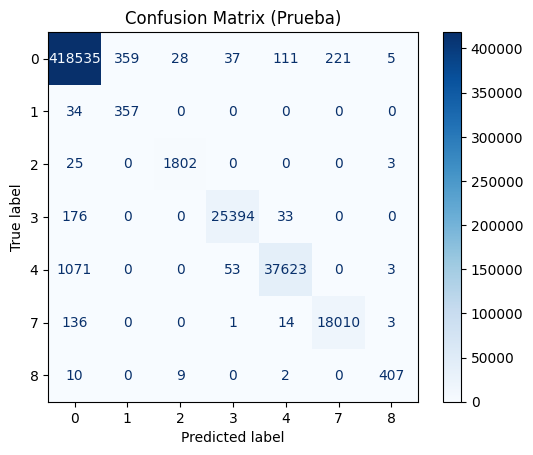


Classification Report:
               precision    recall  f1-score   support

           0     0.9965    0.9982    0.9974    419296
           1     0.4986    0.9130    0.6450       391
           2     0.9799    0.9847    0.9823      1830
           3     0.9964    0.9918    0.9941     25603
           4     0.9958    0.9709    0.9832     38750
           7     0.9879    0.9915    0.9897     18164
           8     0.9667    0.9509    0.9588       428

    accuracy                         0.9954    504462
   macro avg     0.9174    0.9716    0.9358    504462
weighted avg     0.9957    0.9954    0.9955    504462



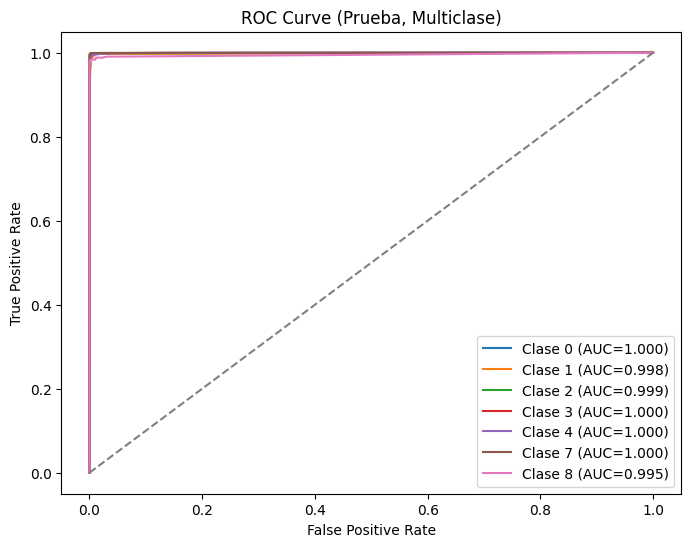

In [ ]:
# Usa average='macro' para problemas multiclase
val_accuracy = accuracy_score(y_test_e, y_test_pred)
val_precision = precision_score(y_test_e, y_test_pred, average='macro')
val_recall = recall_score(y_test_e, y_test_pred, average='macro')
val_f1 = f1_score(y_test_e, y_test_pred, average='macro')

# Para ROC-AUC en multiclase, usa "ovr" (one vs rest)
val_auc = roc_auc_score(y_test_e, y_test_proba, multi_class='ovr', average='macro')

print("Validation Accuracy:", val_accuracy)
print("\nPrecision (Prueba):", val_precision)
print("\nRecall (Prueba):", val_recall)
print("\nF1 Score (Prueba):", val_f1)
print("\nAUC (Prueba):", val_auc)

labels_reales = sorted(y_test_e.unique())
print("Etiquetas reales:", labels_reales)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix_test = confusion_matrix(y_test_e, y_test_pred, labels=labels_reales)
disp = ConfusionMatrixDisplay(conf_matrix_test, display_labels=labels_reales)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Prueba)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


# Clasification report por clase
print("\nClassification Report:\n", classification_report(y_test_e, y_test_pred, digits=4))

# Graficar ROC para cada clase
from sklearn.preprocessing import label_binarize
classes = sorted(y_test_e.unique())
y_test_bin = label_binarize(y_test_e, classes=classes)

plt.figure(figsize=(8,6))
for i, class_num in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_test_proba[:,i])
    plt.plot(fpr, tpr, label=f'Clase {class_num} (AUC={roc_auc_score(y_test_bin[:,i], y_test_proba[:,i]):.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Prueba, Multiclase)")
plt.legend(loc="lower right")
plt.show()

# **Exportar**

In [ ]:
import joblib

# Guardar el modelo entrenado
joblib.dump(model, 'random_forest_model.joblib')

# Guardar el escalador (RobustScaler)
joblib.dump(numerical_transformer, 'scaler_robust_model.joblib')

# Guardar el preprocesador que incluye el RobustScaler
joblib.dump(preprocessor, 'preprocessor_model.joblib')

# Guardar el PCA (si lo usas)
joblib.dump(pca, 'pca_model.joblib')


['pca_model.joblib']